In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [3]:
data = pd.read_csv('final_data.csv')

In [4]:
data.shape

(795693, 40)

In [5]:
default = data[data['label'] == 1]
paid = data[data['label'] == 0]

In [8]:
df_dur = default.duration.tolist()
pd_dur = paid.duration.tolist()

(array([  3.49080000e+04,   6.19450000e+04,   4.34200000e+04,
          3.31210000e+04,   1.53740000e+04,   6.62300000e+03,
          1.81700000e+03,   6.77000000e+02,   2.80000000e+02,
          1.60000000e+01]),
 array([  0. ,   6.6,  13.2,  19.8,  26.4,  33. ,  39.6,  46.2,  52.8,
         59.4,  66. ]),
 <a list of 10 Patch objects>)

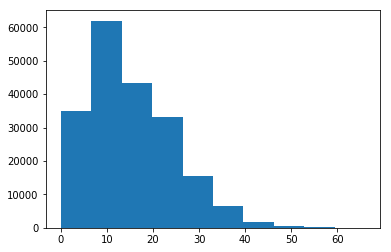

In [9]:
plt.hist(df_dur)

(array([  9.50770000e+04,   1.23776000e+05,   1.13037000e+05,
          8.59420000e+04,   5.97100000e+04,   1.09340000e+05,
          4.15300000e+03,   2.25600000e+03,   4.20200000e+03,
          1.90000000e+01]),
 array([  0.,   7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.]),
 <a list of 10 Patch objects>)

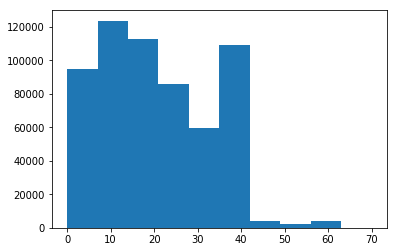

In [10]:
plt.hist(pd_dur)

In [12]:
df_ratio = default.pymnt_ratio.tolist()
pd_ratio = paid.pymnt_ratio.tolist()

(array([  1.89590000e+04,   4.57550000e+04,   5.06420000e+04,
          3.72350000e+04,   2.36700000e+04,   1.38040000e+04,
          6.46900000e+03,   1.35900000e+03,   2.51000000e+02,
          3.70000000e+01]),
 array([  1.34453782e-04,   1.72707808e-01,   3.45281163e-01,
          5.17854518e-01,   6.90427872e-01,   8.63001227e-01,
          1.03557458e+00,   1.20814794e+00,   1.38072129e+00,
          1.55329465e+00,   1.72586800e+00]),
 <a list of 10 Patch objects>)

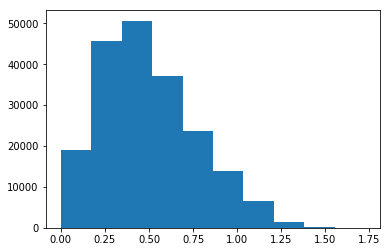

In [13]:
plt.hist(df_ratio)

(array([ 142179.,  205842.,  141878.,   65917.,   24165.,    9580.,
           4229.,    2309.,    1103.,     310.]),
 array([ 1.        ,  1.07598192,  1.15196383,  1.22794575,  1.30392767,
         1.37990958,  1.4558915 ,  1.53187342,  1.60785534,  1.68383725,
         1.75981917]),
 <a list of 10 Patch objects>)

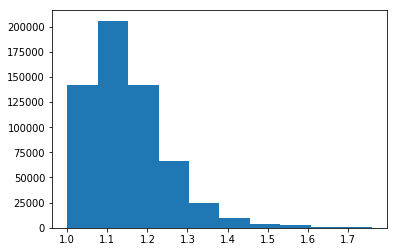

In [14]:
plt.hist(pd_ratio)

In [15]:
min(pd_ratio)

1.0

In [16]:
max(df_ratio)

1.725868

In [19]:
sum([1 for _ in df_ratio if _ > 1]) / len(df_ratio)

0.05187681967494361

In [39]:
X_df = [[t, 1] for t in df_ratio]
X_pd = [[t, 0] for t in pd_ratio]
X = X_df + X_pd

In [40]:
random.shuffle(X)
train, test = [], []
for d in X:
    if random.random() > 0.8:
        test.append(d)
    else:
        train.append(d)

In [41]:
train = np.array(train)
test = np.array(test)

In [42]:
clf = linear_model.SGDClassifier()
clf.fit(train[:,0].reshape(-1, 1), train[:,1])

/Users/lin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [43]:
y_hat = clf.predict(test[:,0].reshape(-1, 1))

In [44]:
roc_auc_score(test[:, 1], y_hat)

0.95718214619130526